# Test case seasonality

/Users/Joris/Documents/Studie/Information Studies/ING-project/test_simulation/Seasonality


,time,scaler_value
0,0,0.16
1,3600,0.08
2,7200,0.08
3,10800,0.08
4,14400,0.12


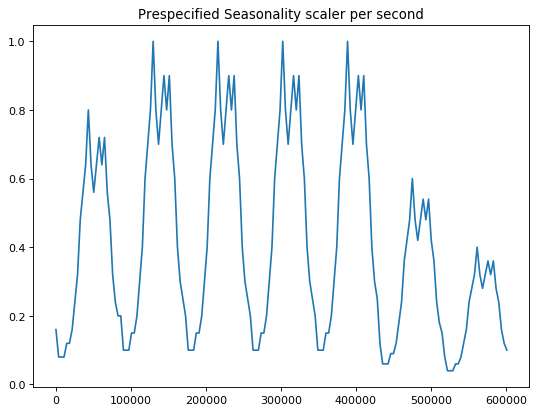

In [7]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
print(os.getcwd())
from Seasonality_adjustment import Seasonality, TransactionInterval
csv_filename= "seasonality_values.csv"
seasonality_df = pd.read_csv(csv_filename, sep = ";")
display(seasonality_df.head())
plt.figure(num=1, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(seasonality_df["time"], seasonality_df["scaler_value"])
plt.title("Prespecified Seasonality scaler per second")
plt.savefig("SpecifiedSeasonality.png")
plt.show()


## Expected volume

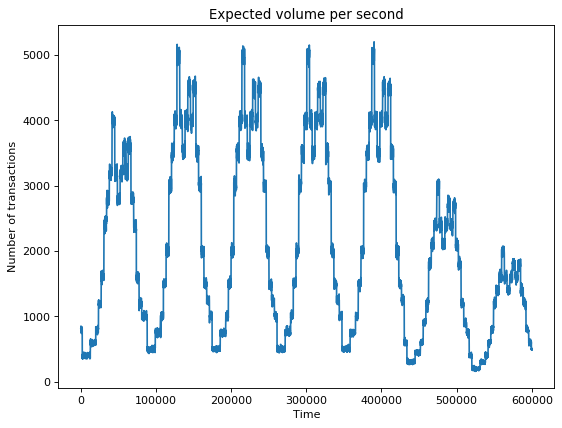

In [5]:
time_scale = np.linspace(0, 600000, 10000)
max_vol = 5000
season = Seasonality(csv_filename)

def volume(time, max_volume, seasonality):
    volumes = [np.random.gamma(seasonality.scale(time_point) * max_volume,1)
                for time_point in time]
    return(np.array(volumes))
    
plt.figure(num=2, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(time_scale, volume(time_scale, max_vol, season))
plt.xlabel('Time')
plt.ylabel('Number of transactions')
plt.axis('tight')
plt.title("Expected volume per second")
plt.savefig("Expected_volume.png")
plt.show()


## Interval between transactions

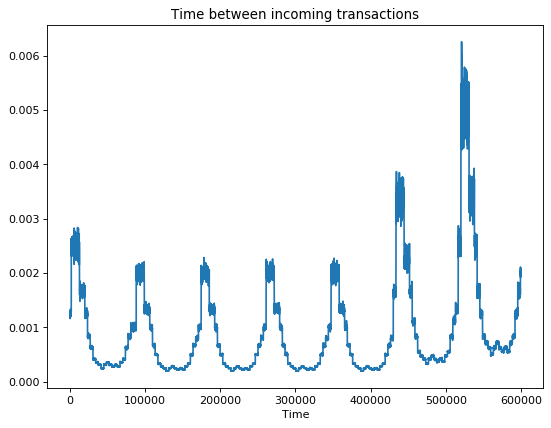

In [6]:
t_interval = TransactionInterval(csv_filename, max_volume = max_vol)

def interval(time, max_volume, t_interval):
        intervals = [t_interval.interval(time_point) for time_point in time]
        return(intervals)
    

plt.figure(num=3, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# plt.plot(time_scale/(3600*24), 1/volume(time_scale, max_vol, season))
plt.plot(time_scale, interval(time_scale,max_vol, t_interval))
plt.xlabel('Time')
plt.axis('tight')
plt.title("Time between incoming transactions")
plt.savefig("InterTransactionTime.png")
plt.show()